In [1]:
%run dataset.py
%run dataext.py

ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [2]:
import sklearn
%matplotlib notebook

<IPython.core.display.Javascript object>


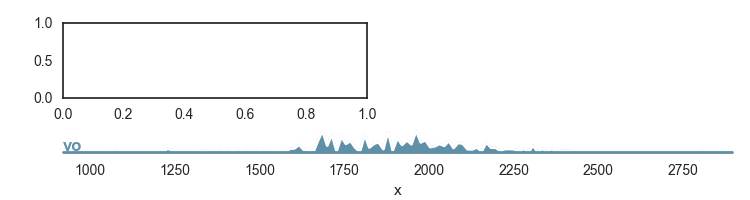

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m


#change data
x = avdataset['qomav']
g = avdataset['genre']
df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [5]:
avdataset.keys()

Index([u'key', u'handstrat', u'participant', u'melody', u'sex', u'age',
       u'score', u'genre', u'proc', u'qommax', u'qommin', u'qomav',
       u'handdistmax', u'handdistmin', u'handdistav', u'zmax', u'zmin', u'zav',
       u'distlh', u'distrh', u'melcat'],
      dtype='object')

In [12]:
'''to show that '''

coords = pd.DataFrame.as_matrix(getlhrh(tracings[i])['rh'])
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
tckp,u = splprep([x,y,z],s=3.0,k=2,nest=-1)
xnew,ynew,znew = splev(linspace(0,1,600),tckp)
# fig,ax = plt.subplots()
# plt.plot(tckp)
# plt.plot(u)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xnew,ynew,znew)
ax.plot(x,y,z)
# ax.plot(tckp[1][0],tckp[1][1],tckp[1][2])

ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [6]:
# curve fit

import numpy as np
from scipy.optimize import leastsq

p0 = [0, 0, 0, 1]

def fitfunc(p, coords):
    x0, y0, z0, R = p
    x, y, z = coords.T
    return np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)

errfunc = lambda p, x: fitfunc(p, x) - p[3]

coordinates = []
keys = []

for i in range(len(pieces)):
    coords = pd.DataFrame.as_matrix(getlhrh(pieces[i])['rh'])
    p1, flag = leastsq(errfunc, p0, args=(coords,))
    coordinates.append(p1)
    keys.append(int(i))

ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


stri = '1_1_4'

x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
y = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,1]
z = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,2]

x1 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
y2 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
z3 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)
ax.plot(x1,y2,z3)

ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [11]:
'''learning features - bspline coeffs, vels, peaks, handdistav, qomav, zav- UPDATE AGAIN WITH UPSAMPLED FROM INTERPOLATION'''

from numpy import arange, cos, linspace, pi, sin, random
from scipy.interpolate import splprep, splev

# make ascending spiral in 3-space
# t=linspace(0,1.75*2*pi,100)
key,handstrat,participant,melody,sex,age,score,genre,proc,knot_vectors,bspline_coeffs = ([] for i in range(11))
cols=['key','handstrat','participant','melody','sex','age','score','genre','proc','knot_vectors','bspline_coeffs']


for i in range(len(tracings)):
    coords = pd.DataFrame.as_matrix(getlhrh(tracings[i])['rh'])
    x = coords[:,0]
    y = coords[:,1]
    z = coords[:,2]
    tckp,u = splprep([x,y,z],s=1.0,k=2,nest=10)
    xnew,ynew,znew = splev(linspace(0,1,600),tckp)
    key.append(int(i))
    handstrat.append(int(returnDetails(tracings[i])['typeID']))
    partic = int(returnDetails(tracings[i])['partID'])
    participant.append(partic)
    melID = int(returnDetails(tracings[i])['melID'])
    melody.append(melID)
    sex.append(list(participants.loc[participants.index[partic],['sex']])[0])
    age.append(int(participants.loc[participants.index[partic],['age']]))
    score.append(int(participants.loc[participants.index[partic],['scoreMus']]))
    if int(melID) in im:
        genre.append('im')
    elif int(melID) in jo:
        genre.append('jo')
    elif int(melID) in sc:
        genre.append('sc')
    elif int(melID) in vo:
        genre.append('vo')
    if int(melID) <=16:
        proc.append('norm')
    elif int(melID) >=16:
        proc.append('syn')
    knot_vectors.append(tckp[0])
    bspline_coeffs.append(tckp[1])



ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [10]:
# for i in range(len(key)):
#     splinedataset = pd.DataFrame(zip(key,handstrat,participant,melody,sex,age,score,genre,proc,knot_vectors,bspline_coeffs))
#     splinedataset.columns=cols
# splinedataset['melcat'] = pd.read_excel('avdataset.xls')[['melcat']]
bsplines1 = []
bsplines2 = []
bsplines3 = []
knots = pd.DataFrame(knot_vectors)
for i in range(len(bspline_coeffs)):
    bsplines1.append(bspline_coeffs[i][0])
    bsplines2.append(bspline_coeffs[i][1])
    bsplines3.append(bspline_coeffs[i][2])
    
bsplines = pd.concat([pd.DataFrame(bsplines1),pd.DataFrame(bsplines2),pd.DataFrame(bsplines3)],axis = 1)
features = pd.concat([knots,bsplines],axis=1)
features['melcat'] = pd.read_excel('avdataset.xls')[['melcat']]
features['qomav'] = pd.read_excel('avdataset.xls')[['qomav']]
features['zmax'] = pd.read_excel('avdataset.xls')[['zmax']]
features['zmin'] = pd.read_excel('avdataset.xls')[['zmin']]
features['handdistav'] = pd.read_excel('avdataset.xls')[['handdistav']]

NameError: name 'knot_vectors' is not defined

In [506]:
test_labels = pd.DataFrame(splinedataset['melcat'].iloc[300:])
test_labels = pd.DataFrame.as_matrix(test_labels)
splinedataset.keys()

Index([u'key', u'handstrat', u'participant', u'melody', u'sex', u'age',
       u'score', u'genre', u'proc', u'knot_vectors', u'bspline_coeffs',
       u'melcat'],
      dtype='object')

In [515]:
training_features = pd.DataFrame(features.iloc[:300])
training_labels = pd.DataFrame(splinedataset['melcat'].iloc[:300])
test_features = pd.DataFrame(features.iloc[300:])
test_labels = pd.DataFrame(splinedataset['melcat'].iloc[300:])

In [516]:
from sklearn.neighbors import KNeighborsClassifier
# model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
sklearn.__path__
model = KNeighborsClassifier(n_neighbors=2)
model.fit(training_features,training_labels)
predicted_labels = model.predict(test_features)
# print(predicted_labels,test_labels.T)

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.

In [501]:
'''cross validation - incomplete write tomorrow'''

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

features.shape, test_features.shape

((0, 0), (20, 36))

In [9]:
'''sample 3d plotting for splines'''

import pylab
pylab.subplot(2,2,1)
data,=pylab.plot(x,y,'bo-',label='data')
fit,=pylab.plot(xnew,ynew,'r-',label='fit')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')

pylab.subplot(2,2,2)
data,=pylab.plot(x,z,'bo-',label='data')
fit,=pylab.plot(xnew,znew,'r-',label='fit')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('z')

pylab.subplot(2,2,3)
data,=pylab.plot(y,z,'bo-',label='data')
fit,=pylab.plot(ynew,znew,'r-',label='fit')
pylab.legend()
pylab.xlabel('y')
pylab.ylabel('z')

pylab.savefig('splprep_demo.png')

NameError: name 'y' is not defined